## Тема №20: 

Вирусный маркетинг в модели перколяции на решетке Бете со случайным координационным числом и различной топологией решетки. 
<br> Координационное число из:
- равномерного распределения 
- гауссова распределения
- распределения Парето
- q-гауссова распределения

Другие топологии:
- Сеть с экспоненциальным распределением по степеням узлов
- Сеть Эрдёша-Реньи
- Сеть Барабаши-Альберт

In [1]:
import numpy as np
from numpy.random import rand
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import math
from random import uniform, choice
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
from datetime import datetime

# Часть-1: решетка Бете

У стандартной решетки ожидаем, что критический переход происходит в точке:
<br> **Pc** = **1** / (**Z** - **1**), **Z** - координационное число. 
<br> И т.к. наши модели стохастические, то у нас Z скорее всего будет математическим ожиданием числа вершин-детей на каждом уровне (слое). 

In [2]:
# Подготовим специальные функции для того, чтобы рандомные числа из специальных распределений генерировались в нужном диапазоне

def positive_normal_z():

    z = np.round(
        a=np.random.normal(loc=4, scale=3)
        , decimals=0
    )
    
    while z < 1:
        
        z = np.round(
            a=np.random.normal(loc=4, scale=3)
            , decimals=0
        )
        
    return z


def handy_pareto_z(lower_boundary=2, upper_boundary=8):
    
    pareto_z = np.round(np.random.pareto(a=2) * 10)
    
    while pareto_z > upper_boundary or pareto_z < lower_boundary:
        
        pareto_z = np.round(np.random.pareto(a=2) * 10)
        
    return pareto_z


def handy_student_z(lower_boundary=2, upper_boundary=10):
    
    student_z = np.round(np.random.standard_t(df=1) + 1)
    
    while student_z < lower_boundary or student_z > upper_boundary:
        
        student_z = np.round(np.random.standard_t(df=1) + 1)
        
    return student_z
    
    

In [3]:
class random_bethe_lattice:
    
    def __init__(self, distribution_class='uniform', depth=50, seed=8):
        """
        distribution_class: 
            - из какого распределения брать случайную величину
            - Должен принадлежать множеству: {'uniform', 'normal', 'pareto', 'q-gauss'}
        depth: Число уровней (слоев) в решетке
        seed: seed для фиксации генерации случайной величины
        """
        
        allowed_distributions = {'uniform', 'normal', 'pareto', 'q-gauss'}
        
        np.random.seed(seed)
        
        self.lattice = []
        self.random_z = []
        self.depth = depth
        
        # Генерация радомных координационных чисел
        
        if distribution_class not in allowed_distributions:
            
            print('Your distribution must be from this list: {0}. \nPlease, try once again. '.format(allowed_distributions))
        
        elif distribution_class == 'uniform':
            
            self.random_z += [np.round(np.random.uniform(low=3, high=5))]
            
            for level in range(1, depth - 1):
                self.random_z.append(np.round(np.random.uniform(low=2, high=8)))
        
        elif distribution_class == 'normal':
            
            self.random_z += [positive_normal_z()]
            
            for level in range(1, depth - 1):
                self.random_z.append(positive_normal_z())
        
        elif distribution_class == 'pareto':
            
            self.random_z += [handy_pareto_z()]
            
            for level in range(1, depth - 1):
                self.random_z.append(handy_pareto_z())
        
        elif distribution_class == 'q-gauss':
            
            self.random_z += [handy_student_z()]
            
            for level in range(1, depth - 1):
                self.random_z.append(handy_student_z())
            
        
        # Генерация решетки Бете
        
        self.lattice = [1]
        
        for level in range(1, depth):
            
            child_nodes_num = self.lattice[level - 1] * self.random_z[level - 1]
            self.lattice.append(child_nodes_num)
            
        print('Lattice config is up & ready. ')
        
        
    def simulate_percolation(self, p):
        """
        p: Вероятность передачи следующей вершине информации
        """
        
        percolation_success = False
        actives = [1]  # Список, где число на позиции i - число активных вершин в i-ой оболочке
        
        for level in range(1, len(self.lattice)):
            
            to_be_poisoned = int(actives[level - 1] * self.random_z[level - 1])  # Число претендентов на отравление
            
            poisoned = np.random.choice(
                a=[0, 1]
                , p=[1 - p, p]
                , size=to_be_poisoned
            )
            
            actives.append(sum(poisoned))
            
            stats_str = """
            To poison = {0}
            Got poisoned = {1}
            """.format(to_be_poisoned, actives[level])
            
            if actives[level] == 0:
                
                break
            
            
        if len(actives) == self.depth:
            
            percolation_success = True

            
        return percolation_success
            

## Равномерное распределение координационного числа по оболочкам

In [4]:
# Генерируем решетку
rb_lat = random_bethe_lattice(
    distribution_class='uniform'
    , depth=10
)

step = 0.01 / 3
probs = np.arange(0, 1, step)  # Шаг в половину процента

N_EXPS = 300

perc_probs = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    
    for exp_num in range(N_EXPS):
        
        if rb_lat.simulate_percolation(p=p):
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
            
        else:
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())
        
        


Lattice config is up & ready. 
p = 0.0
p = 0.0033333333333333335
p = 0.006666666666666667
p = 0.01
p = 0.013333333333333334
p = 0.016666666666666666
p = 0.02
p = 0.023333333333333334
p = 0.02666666666666667
p = 0.030000000000000002
p = 0.03333333333333333
p = 0.03666666666666667
p = 0.04
p = 0.043333333333333335
p = 0.04666666666666667
p = 0.05
p = 0.05333333333333334
p = 0.05666666666666667
p = 0.060000000000000005
p = 0.06333333333333334
p = 0.06666666666666667
p = 0.07
p = 0.07333333333333333
p = 0.07666666666666667
p = 0.08
p = 0.08333333333333334
p = 0.08666666666666667
p = 0.09000000000000001
p = 0.09333333333333334
p = 0.09666666666666668
p = 0.1
p = 0.10333333333333335
p = 0.10666666666666667
p = 0.11
p = 0.11333333333333334
p = 0.11666666666666667
p = 0.12000000000000001
p = 0.12333333333333334
p = 0.12666666666666668
p = 0.13
p = 0.13333333333333333
p = 0.1366666666666667
p = 0.14
p = 0.14333333333333334
p = 0.14666666666666667
p = 0.15000000000000002
p = 0.15333333333333335


In [5]:
s = 0

for v in rb_lat.random_z:
    
    s += v
    
EV = s / (rb_lat.depth - 1)

Pc = 1 / EV

print(Pc, EV)

0.20454545454545453 4.888888888888889


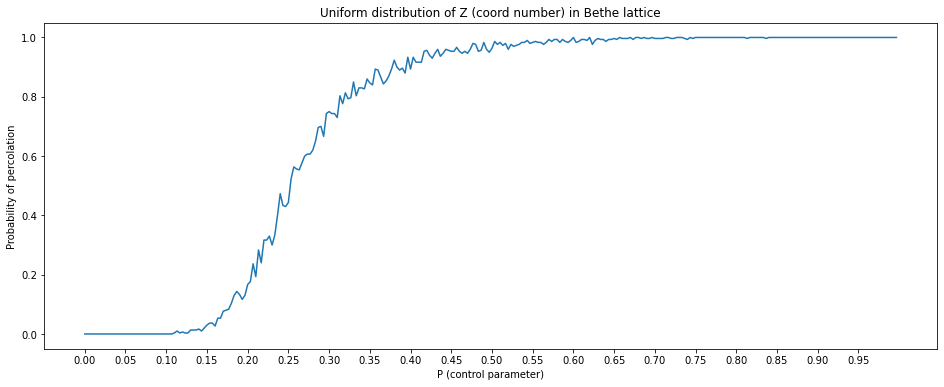

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title('Uniform distribution of Z (coord number) in Bethe lattice')
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('bethe_uniform.png', dpi=600)

## Нормальное распределение координационного числа по оболочкам

In [14]:
# Генерируем решетку
rb_lat_normal = random_bethe_lattice(
    distribution_class='normal'
    , depth=10, seed=1
)

step = 0.01 / 5
probs = np.arange(0, 1, step)  # Шаг в половину процента

N_EXPS = 500

perc_probs = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    
    for exp_num in range(N_EXPS):
        
        if rb_lat_normal.simulate_percolation(p=p):
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
            
        else:
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())

Lattice config is up & ready. 
p = 0.0
p = 0.002
p = 0.004
p = 0.006
p = 0.008
p = 0.01
p = 0.012
p = 0.014
p = 0.016
p = 0.018000000000000002
p = 0.02
p = 0.022
p = 0.024
p = 0.026000000000000002
p = 0.028
p = 0.03
p = 0.032
p = 0.034
p = 0.036000000000000004
p = 0.038
p = 0.04
p = 0.042
p = 0.044
p = 0.046
p = 0.048
p = 0.05
p = 0.052000000000000005
p = 0.054
p = 0.056
p = 0.058
p = 0.06
p = 0.062
p = 0.064
p = 0.066
p = 0.068
p = 0.07
p = 0.07200000000000001
p = 0.074
p = 0.076
p = 0.078
p = 0.08
p = 0.082
p = 0.084
p = 0.08600000000000001
p = 0.088
p = 0.09
p = 0.092
p = 0.094
p = 0.096
p = 0.098
p = 0.1
p = 0.10200000000000001
p = 0.10400000000000001
p = 0.106
p = 0.108
p = 0.11
p = 0.112
p = 0.114
p = 0.116
p = 0.11800000000000001
p = 0.12
p = 0.122
p = 0.124
p = 0.126
p = 0.128
p = 0.13
p = 0.132
p = 0.134
p = 0.136
p = 0.138
p = 0.14
p = 0.14200000000000002
p = 0.14400000000000002
p = 0.146
p = 0.148
p = 0.15
p = 0.152
p = 0.154
p = 0.156
p = 0.158
p = 0.16
p = 0.162
p = 0.164


In [15]:
s = 0

for v in rb_lat_normal.random_z:
    s += v
    
EV = s / (rb_lat_normal.depth - 1)
Pc = 1 / EV

print(Pc, EV)

0.22499999999999998 4.444444444444445


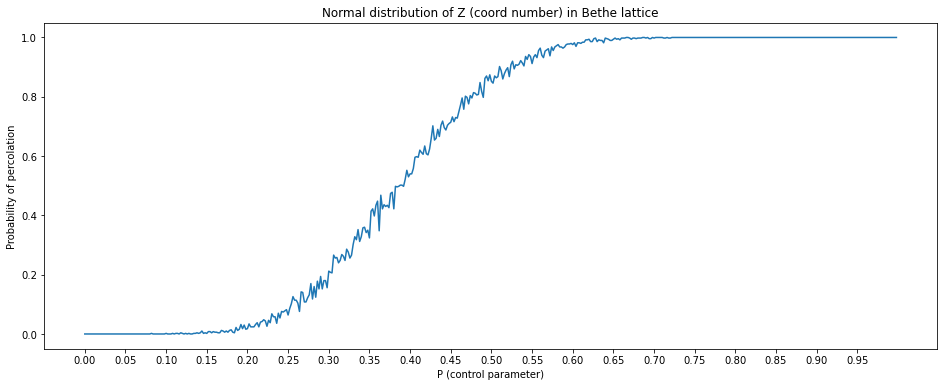

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title('Normal distribution of Z (coord number) in Bethe lattice')
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('bethe_normal.png', dpi=600)


## Парето-распределение координационного числа по оболочкам

In [20]:
# Генерируем решетку
rb_lat_pareto = random_bethe_lattice(distribution_class='pareto', depth=10)

step = 0.01 / 5
probs = np.arange(0, 1, step)  # Шаг в половину процента

N_EXPS = 500

perc_probs = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    
    for exp_num in range(N_EXPS):
        
        if rb_lat_pareto.simulate_percolation(p=p):
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
            
        else:
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())

Lattice config is up & ready. 
p = 0.0
p = 0.002
p = 0.004
p = 0.006
p = 0.008
p = 0.01
p = 0.012
p = 0.014
p = 0.016
p = 0.018000000000000002
p = 0.02
p = 0.022
p = 0.024
p = 0.026000000000000002
p = 0.028
p = 0.03
p = 0.032
p = 0.034
p = 0.036000000000000004
p = 0.038
p = 0.04
p = 0.042
p = 0.044
p = 0.046
p = 0.048
p = 0.05
p = 0.052000000000000005
p = 0.054
p = 0.056
p = 0.058
p = 0.06
p = 0.062
p = 0.064
p = 0.066
p = 0.068
p = 0.07
p = 0.07200000000000001
p = 0.074
p = 0.076
p = 0.078
p = 0.08
p = 0.082
p = 0.084
p = 0.08600000000000001
p = 0.088
p = 0.09
p = 0.092
p = 0.094
p = 0.096
p = 0.098
p = 0.1
p = 0.10200000000000001
p = 0.10400000000000001
p = 0.106
p = 0.108
p = 0.11
p = 0.112
p = 0.114
p = 0.116
p = 0.11800000000000001
p = 0.12
p = 0.122
p = 0.124
p = 0.126
p = 0.128
p = 0.13
p = 0.132
p = 0.134
p = 0.136
p = 0.138
p = 0.14
p = 0.14200000000000002
p = 0.14400000000000002
p = 0.146
p = 0.148
p = 0.15
p = 0.152
p = 0.154
p = 0.156
p = 0.158
p = 0.16
p = 0.162
p = 0.164


In [21]:
s = 0

for v in rb_lat_pareto.random_z:
    s += v
    
EV = s / (rb_lat_pareto.depth - 1)
Pc = 1 / EV

print(Pc, EV)

0.23684210526315788 4.222222222222222


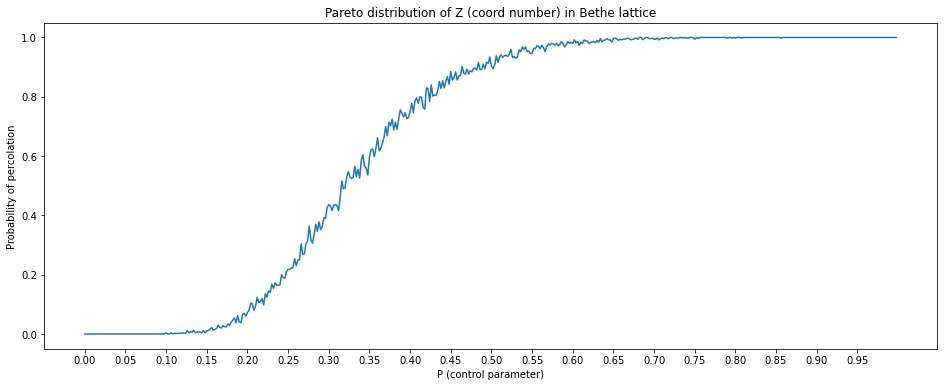

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title('Pareto distribution of Z (coord number) in Bethe lattice')
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('bethe_pareto.png', dpi=600)


## q-Гауссово распределение координационного числа по оболочкам

**ВАЖНО!!!**
<br>Я не смог реализовать q-Гауссово распределение, но если верить Wiki, то на хвостах оно эквивалентно распределению Стьюдента. 
<br>Поэтому попробуем заменить его на распределение Стьюдента с тяжелыми хвостами (малым числом степеней свободы). 
<br> https://en.wikipedia.org/wiki/Q-Gaussian_distribution

In [26]:
rb_lat_q_gauss = random_bethe_lattice(distribution_class='q-gauss', depth=10, seed=1)

step = 0.01 / 3
probs = np.arange(0, 1, step)  # Шаг в половину процента

N_EXPS = 200

perc_probs = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    
    for exp_num in range(N_EXPS):
        
        if rb_lat_q_gauss.simulate_percolation(p=p):
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
            
        else:
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())

Lattice config is up & ready. 
p = 0.0
p = 0.0033333333333333335
p = 0.006666666666666667
p = 0.01
p = 0.013333333333333334
p = 0.016666666666666666
p = 0.02
p = 0.023333333333333334
p = 0.02666666666666667
p = 0.030000000000000002
p = 0.03333333333333333
p = 0.03666666666666667
p = 0.04
p = 0.043333333333333335
p = 0.04666666666666667
p = 0.05
p = 0.05333333333333334
p = 0.05666666666666667
p = 0.060000000000000005
p = 0.06333333333333334
p = 0.06666666666666667
p = 0.07
p = 0.07333333333333333
p = 0.07666666666666667
p = 0.08
p = 0.08333333333333334
p = 0.08666666666666667
p = 0.09000000000000001
p = 0.09333333333333334
p = 0.09666666666666668
p = 0.1
p = 0.10333333333333335
p = 0.10666666666666667
p = 0.11
p = 0.11333333333333334
p = 0.11666666666666667
p = 0.12000000000000001
p = 0.12333333333333334
p = 0.12666666666666668
p = 0.13
p = 0.13333333333333333
p = 0.1366666666666667
p = 0.14
p = 0.14333333333333334
p = 0.14666666666666667
p = 0.15000000000000002
p = 0.15333333333333335


In [27]:
s = 0

for v in rb_lat_q_gauss.random_z:
    s += v
    
EV = s / (rb_lat_q_gauss.depth - 1)
Pc = 1 / EV

print(Pc, EV)

0.20454545454545453 4.888888888888889


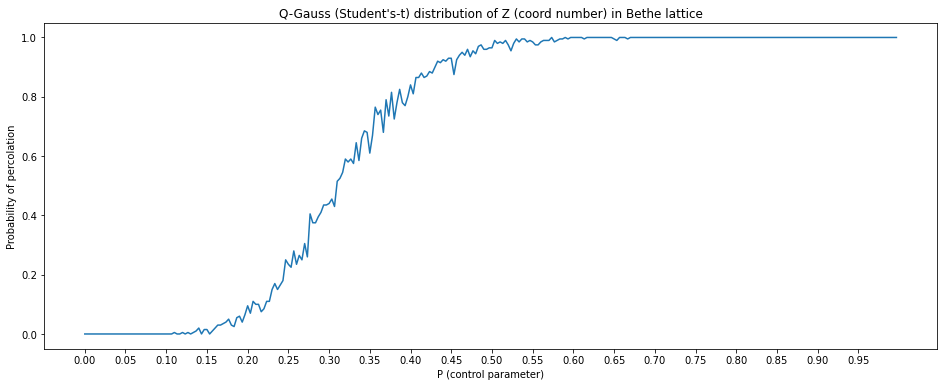

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title("Q-Gauss (Student's-t) distribution of Z (coord number) in Bethe lattice")
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(np.arange(0, 1, 0.05))

plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('bethe_student.png', dpi=600)

# Вспомогательная функция симуляции вирусного маркетинга в перколяции:

In [29]:
def spread_q(g, node: int, p: float, q: list):
    """
    q - очередь из вершин, которые должны заразить своих соседей
    """
    nbs = g[node]  # Соседи этой вершины
    
    for nb in nbs:
        
        if g.nodes[nb]['is_active']:
            # Если сосед имеет статус is_active (то есть заражен) -- пропускаем его
            pass
        
        else:
            
            got_poisoned = np.random.choice(
                a=[False, True]
                , p=[1 - p, p]
            )
            # Пытаемся заразить соседа с вероятностью p
            
            if got_poisoned:  # Если сосед заразился -- добавляем его в очередь, помечаем зараженным на графе
                
                q.append(nb)
                
                g.nodes[nb]['is_active'] = True
                
    q.pop(0)  # Убираем из очереди вершину, от лица которой сейчас заражали соседей
                      
    return q


def simulate_percolation_queue(g, p, patient_zero_node):
    
    queue_to_spread = [patient_zero_node]  # Очередь из вершин, которые заражены, но мы еще не проводили процесс заражения ими их соседей    
    poisoned = set()
    
    while True:
        
        try:
            curr_node = queue_to_spread[0]
            poisoned.add(curr_node)
            
        except IndexError:
            
            # Список вершин пуст - завершаем симуляцию. 
            break
            
        queue_to_spread = spread_q(
            g=g
            , node=curr_node
            , p=p
            , q=queue_to_spread
        )
        
    
    # Возвращаем долю зараженных вершин и флаг, что весь граф заражен (доля == 1)
    
    return len(poisoned) / len(g.nodes), len(poisoned) == len(g.nodes)
        


# Часть-2: сеть с экспоненциальным распределением степеней вершин

In [35]:
# Генерируем граф
np.random.seed(5102021)
from exponential_graph import exponential_graph
exp_g = exponential_graph(n=100)

# Для каждой вершины (кроме одной) присваиваем статус активности (зараженности) = 0
patient_zero_node = np.random.randint(low=0, high=len(exp_g.nodes))

for node in exp_g.nodes:
    
    if node != patient_zero_node:
        exp_g.nodes[node]['is_active'] = False
        
    else:
        exp_g.nodes[node]['is_active'] = True

In [36]:
step = 0.01
probs = np.arange(0, 1, step)

N_EXPS = 300

perc_probs = np.array([])
infected_nodes_rate = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    sample_for_curr_p_infected_rate = np.array([])
    
    for exp_num in range(N_EXPS):
        
        share, success = simulate_percolation_queue(g=exp_g.copy(), p=p, patient_zero_node=patient_zero_node)
        sample_for_curr_p_infected_rate = np.append(sample_for_curr_p_infected_rate, share)
        
        if success:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
        
        else:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())
    infected_nodes_rate = np.append(infected_nodes_rate, sample_for_curr_p_infected_rate.mean())

p = 0.0
p = 0.01
p = 0.02
p = 0.03
p = 0.04
p = 0.05
p = 0.06
p = 0.07
p = 0.08
p = 0.09
p = 0.1
p = 0.11
p = 0.12
p = 0.13
p = 0.14
p = 0.15
p = 0.16
p = 0.17
p = 0.18
p = 0.19
p = 0.2
p = 0.21
p = 0.22
p = 0.23
p = 0.24
p = 0.25
p = 0.26
p = 0.27
p = 0.28
p = 0.29
p = 0.3
p = 0.31
p = 0.32
p = 0.33
p = 0.34
p = 0.35000000000000003
p = 0.36
p = 0.37
p = 0.38
p = 0.39
p = 0.4
p = 0.41000000000000003
p = 0.42
p = 0.43
p = 0.44
p = 0.45
p = 0.46
p = 0.47000000000000003
p = 0.48
p = 0.49
p = 0.5
p = 0.51
p = 0.52
p = 0.53
p = 0.54
p = 0.55
p = 0.56
p = 0.5700000000000001
p = 0.58
p = 0.59
p = 0.6
p = 0.61
p = 0.62
p = 0.63
p = 0.64
p = 0.65
p = 0.66
p = 0.67
p = 0.68
p = 0.6900000000000001
p = 0.7000000000000001
p = 0.71
p = 0.72
p = 0.73
p = 0.74
p = 0.75
p = 0.76
p = 0.77
p = 0.78
p = 0.79
p = 0.8
p = 0.81
p = 0.8200000000000001
p = 0.8300000000000001
p = 0.84
p = 0.85
p = 0.86
p = 0.87
p = 0.88
p = 0.89
p = 0.9
p = 0.91
p = 0.92
p = 0.93
p = 0.9400000000000001
p = 0.9500000000000001
p 

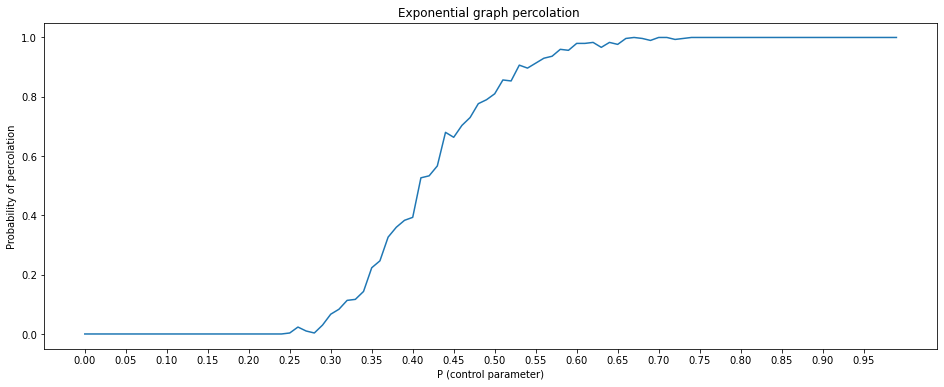

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title("Exponential graph percolation ")
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(ticks=np.arange(0, 1, 0.05))

plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('exp_graph.png', dpi=600)

# Часть-3: сеть Эрдёша-Реньи

In [44]:
G_erdos_renyi = nx.erdos_renyi_graph(n=100, p=0.1, seed=7)

# Для каждой вершины (кроме одной) присваиваем статус активности (зараженности) = 0
np.random.seed(5102021)
patient_zero_node = np.random.randint(low=0, high=len(G_erdos_renyi.nodes))

for node in G_erdos_renyi.nodes:
    
    if node != patient_zero_node:
        G_erdos_renyi.nodes[node]['is_active'] = False
        
    else:
        G_erdos_renyi.nodes[node]['is_active'] = True

In [45]:
step = .01
probs = np.arange(0, 1, step)

N_EXPS = 300

perc_probs = np.array([])
infected_nodes_rate = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    sample_for_curr_p_infected_rate = np.array([])
    
    for exp_num in range(N_EXPS):
        
        share, success = simulate_percolation_queue(g=G_erdos_renyi.copy(), p=p, patient_zero_node=patient_zero_node)
        sample_for_curr_p_infected_rate = np.append(sample_for_curr_p_infected_rate, share)
        
        if success:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
        
        else:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())
    infected_nodes_rate = np.append(infected_nodes_rate, sample_for_curr_p_infected_rate.mean())

p = 0.0
p = 0.01
p = 0.02
p = 0.03
p = 0.04
p = 0.05
p = 0.06
p = 0.07
p = 0.08
p = 0.09
p = 0.1
p = 0.11
p = 0.12
p = 0.13
p = 0.14
p = 0.15
p = 0.16
p = 0.17
p = 0.18
p = 0.19
p = 0.2
p = 0.21
p = 0.22
p = 0.23
p = 0.24
p = 0.25
p = 0.26
p = 0.27
p = 0.28
p = 0.29
p = 0.3
p = 0.31
p = 0.32
p = 0.33
p = 0.34
p = 0.35000000000000003
p = 0.36
p = 0.37
p = 0.38
p = 0.39
p = 0.4
p = 0.41000000000000003
p = 0.42
p = 0.43
p = 0.44
p = 0.45
p = 0.46
p = 0.47000000000000003
p = 0.48
p = 0.49
p = 0.5
p = 0.51
p = 0.52
p = 0.53
p = 0.54
p = 0.55
p = 0.56
p = 0.5700000000000001
p = 0.58
p = 0.59
p = 0.6
p = 0.61
p = 0.62
p = 0.63
p = 0.64
p = 0.65
p = 0.66
p = 0.67
p = 0.68
p = 0.6900000000000001
p = 0.7000000000000001
p = 0.71
p = 0.72
p = 0.73
p = 0.74
p = 0.75
p = 0.76
p = 0.77
p = 0.78
p = 0.79
p = 0.8
p = 0.81
p = 0.8200000000000001
p = 0.8300000000000001
p = 0.84
p = 0.85
p = 0.86
p = 0.87
p = 0.88
p = 0.89
p = 0.9
p = 0.91
p = 0.92
p = 0.93
p = 0.9400000000000001
p = 0.9500000000000001
p 

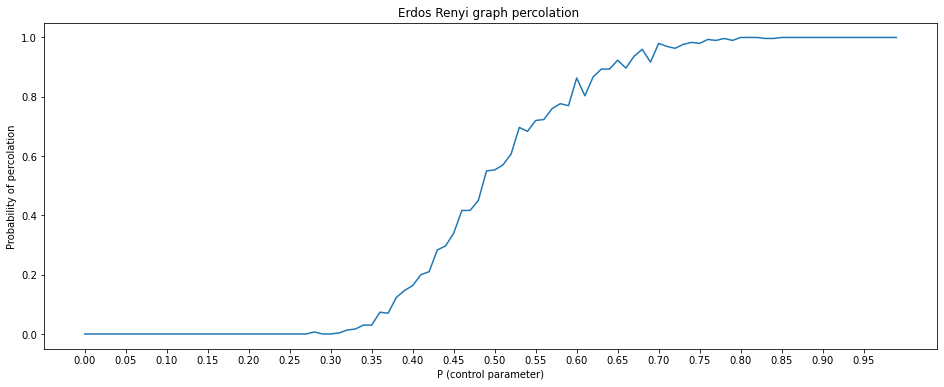

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title("Erdos Renyi graph percolation ")
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(np.arange(0, 1, .05))

plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('erd_ren.png', dpi=600)

# Часть-4: сеть Барабаши-Альберта

In [100]:
ba_g = nx.barabasi_albert_graph(
    n=100
    , m=10
    , seed=7
)
cc = [cc_i for cc_i in nx.connected_components(ba_g)]
print('Graph is connected: {0}'.format(len(cc) == 1))


# Для каждой вершины (кроме одной) присваиваем статус активности (зараженности) = 0
np.random.seed(5102021)
patient_zero_node = np.random.randint(low=0, high=len(ba_g.nodes))

for node in ba_g.nodes:
    
    if node != patient_zero_node:
        ba_g.nodes[node]['is_active'] = False
        
    else:
        ba_g.nodes[node]['is_active'] = True

Graph is connected: True


In [103]:
step = .01 / 2
probs = np.arange(0, 1, step)

N_EXPS = 200

perc_probs = np.array([])
infected_nodes_rate = np.array([])

for p in np.nditer(probs):
    
    print('p = {0}'.format(p))
    
    sample_for_curr_p = np.array([])
    sample_for_curr_p_infected_rate = np.array([])
    
    for exp_num in range(N_EXPS):
        
        share, success = simulate_percolation_queue(g=ba_g.copy(), p=p, patient_zero_node=patient_zero_node)
        sample_for_curr_p_infected_rate = np.append(sample_for_curr_p_infected_rate, share)
        
        if success:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 1)
        
        else:
            
            sample_for_curr_p = np.append(sample_for_curr_p, 0)
            
    perc_probs = np.append(perc_probs, sample_for_curr_p.mean())
    infected_nodes_rate = np.append(infected_nodes_rate, sample_for_curr_p_infected_rate.mean())

p = 0.0
p = 0.005
p = 0.01
p = 0.015
p = 0.02
p = 0.025
p = 0.03
p = 0.035
p = 0.04
p = 0.045
p = 0.05
p = 0.055
p = 0.06
p = 0.065
p = 0.07
p = 0.075
p = 0.08
p = 0.085
p = 0.09
p = 0.095
p = 0.1
p = 0.105
p = 0.11
p = 0.115
p = 0.12
p = 0.125
p = 0.13
p = 0.135
p = 0.14
p = 0.145
p = 0.15
p = 0.155
p = 0.16
p = 0.165
p = 0.17
p = 0.17500000000000002
p = 0.18
p = 0.185
p = 0.19
p = 0.195
p = 0.2
p = 0.20500000000000002
p = 0.21
p = 0.215
p = 0.22
p = 0.225
p = 0.23
p = 0.23500000000000001
p = 0.24
p = 0.245
p = 0.25
p = 0.255
p = 0.26
p = 0.265
p = 0.27
p = 0.275
p = 0.28
p = 0.28500000000000003
p = 0.29
p = 0.295
p = 0.3
p = 0.305
p = 0.31
p = 0.315
p = 0.32
p = 0.325
p = 0.33
p = 0.335
p = 0.34
p = 0.34500000000000003
p = 0.35000000000000003
p = 0.355
p = 0.36
p = 0.365
p = 0.37
p = 0.375
p = 0.38
p = 0.385
p = 0.39
p = 0.395
p = 0.4
p = 0.405
p = 0.41000000000000003
p = 0.41500000000000004
p = 0.42
p = 0.425
p = 0.43
p = 0.435
p = 0.44
p = 0.445
p = 0.45
p = 0.455
p = 0.46
p = 0.46

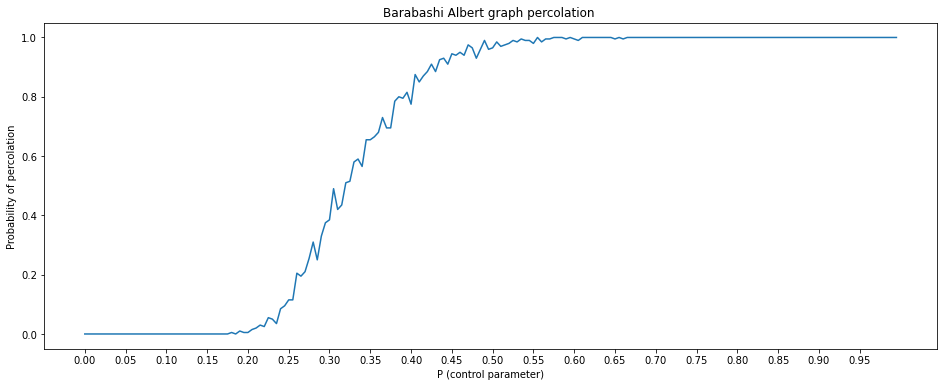

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title("Barabashi Albert graph percolation ")
ax.set_ylabel('Probability of percolation') 
ax.set_xlabel('P (control parameter)')
plt.xticks(np.arange(0, 1, .05))

plt.plot(np.arange(0, 1, step), perc_probs);

plt.savefig('bar_alb.png', dpi=600)